In [2]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import os



# Set paths
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))

figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"


    

## Explore functional profiles in S1-S4 regions 

In [3]:
Data, regions_all = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions_all], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


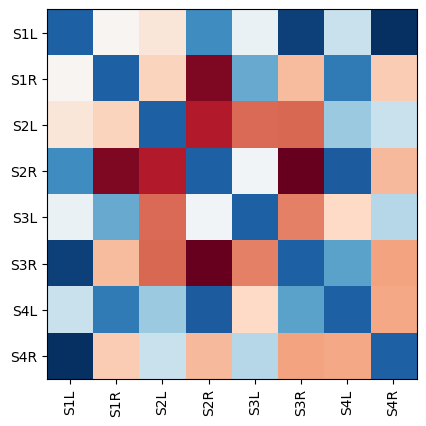

In [4]:
# Correlate profiles between subregions
# Select subregions
regions = ['S1L', 'S1R', 'S2L', 'S2R', 'S3L', 'S3R', 'S4L', 'S4R']
cmap = plt.get_cmap('RdBu_r')
corr = np.corrcoef(Data[regions].to_numpy().T)
# Set diagonal to zero
np.fill_diagonal(corr, 0)
plt.imshow(corr, cmap=cmap)
plt.xticks(np.arange(len(regions)), regions, rotation=90)
plt.yticks(np.arange(len(regions)), regions)
plt.savefig(figure_path + 'social_network_correlation.png', dpi=300)



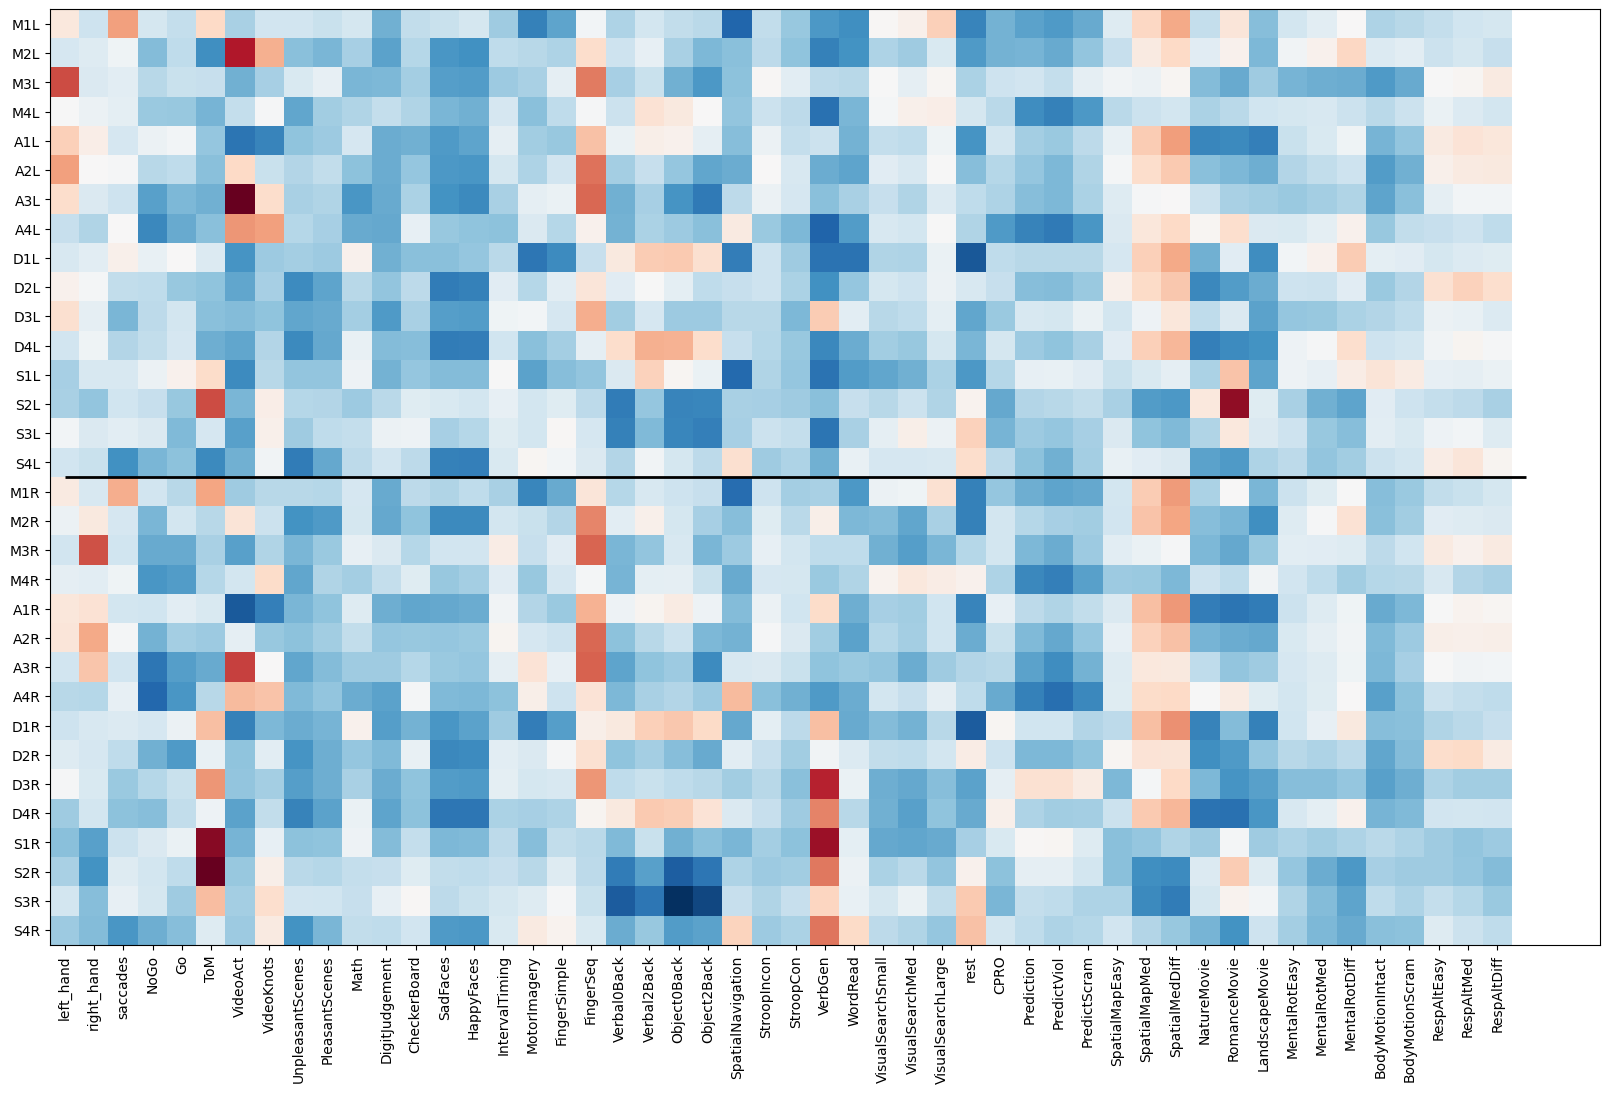

In [5]:
# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions_all)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions_all)), regions_all)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions_all) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)
plt.savefig(f'{figure_path}/feature_matrix.png', dpi=300)


In [6]:
regions = ['S1L','S1R','S2L','S2R','S3L','S3R','S4L','S4R']
reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.5,0.3261,1.0],[0.8166,0.1178,0.5079]]

In [26]:
Feature_regions


,left_hand,right_hand,saccades,NoGo,Go,ToM,VideoAct,VideoKnots,UnpleasantScenes,PleasantScenes,...,RomanceMovie,LandscapeMovie,MentalRotEasy,MentalRotMed,MentalRotDiff,BodyMotionIntact,BodyMotionScram,RespAltEasy,RespAltMed,RespAltDiff
S1L,-0.029506,0.032155,0.034128,0.071040,0.106548,0.159020,-0.136934,-0.009253,-0.052031,-0.052779,...,0.194008,-0.102320,0.073516,0.061483,0.118661,0.137820,0.122382,0.060094,0.059286,0.065694
S1R,-0.062039,-0.107353,0.013449,0.038295,0.068011,0.423985,-0.078829,0.060964,-0.059877,-0.055691,...,0.083271,-0.037162,-0.022087,-0.036022,-0.020552,-0.007750,-0.020792,-0.037112,-0.053788,-0.040205
S2L,-0.028144,-0.054085,0.019207,0.006479,-0.047232,0.329618,-0.077001,0.116497,-0.011486,-0.016181,...,0.415534,0.045666,-0.026371,-0.083046,-0.100639,0.048742,0.014774,0.004996,-0.005395,-0.028295
S2R,-0.026292,-0.125718,0.045386,0.025600,-0.002607,0.454139,-0.046263,0.111946,-0.006033,-0.012188,...,0.184026,0.044251,-0.050721,-0.089644,-0.119747,-0.029393,-0.039827,-0.038178,-0.049748,-0.068355
S3L,0.080923,0.039454,0.052918,0.039145,-0.069219,0.030617,-0.106059,0.110497,-0.038500,-0.000687,...,0.129292,0.037340,0.015266,-0.047896,-0.063805,0.054012,0.035323,0.072671,0.080588,0.044429
S3R,0.022806,-0.065349,0.061466,0.028058,-0.037844,0.203294,-0.031978,0.152761,0.020045,0.018651,...,0.105073,0.081004,-0.017780,-0.066499,-0.102237,-0.000944,-0.021656,0.004397,-0.012905,-0.045576
S4L,0.022225,0.009469,-0.128738,-0.074861,-0.058090,-0.141040,-0.083157,0.078792,-0.164953,-0.094412,...,-0.116775,-0.020817,-0.003724,-0.052427,-0.035983,0.012628,0.023661,0.117613,0.135114,0.102573
S4R,-0.040164,-0.068201,-0.120721,-0.085762,-0.064242,0.045363,-0.041526,0.124229,-0.126478,-0.076471,...,-0.127133,0.015525,-0.031958,-0.074081,-0.091391,-0.060356,-0.058779,0.042852,0.013593,-0.001492


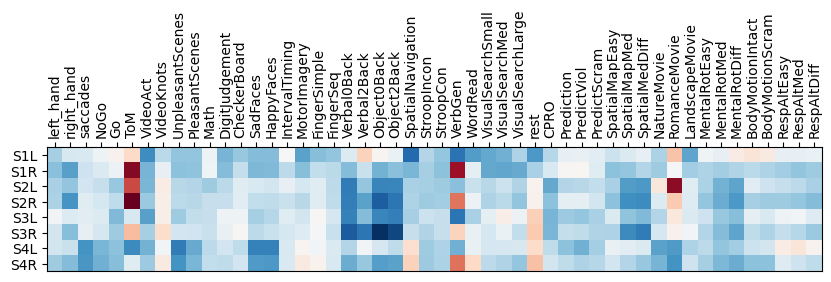

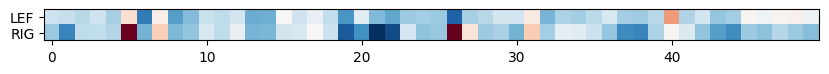

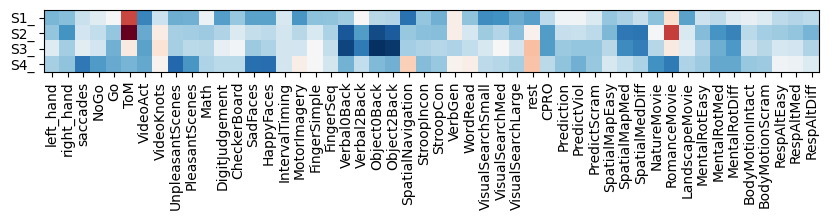

In [49]:
# Only select rows where the region is in the list
Feature_regions = Features.loc[regions]
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(10, 10))
# plt.subplot(3, 1, 1)
plt.imshow(Feature_regions, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)


# Show feature matrix averaged across 'side'
plt.figure(figsize=(10, 10))
# plt.subplot(3,1,2)
plt.imshow(Feature_regions.groupby(Feature_regions.index.str[2:]).mean(), cmap=cmap)
plt.yticks(np.arange(len(Feature_regions.index.str[2:].unique(
))), ['LEF', 'RIG'])

# Show feature matrix averaged across 'side'
plt.figure(figsize=(10, 10))
# plt.subplot(3, 1, 3)
plt.imshow(Feature_regions.groupby(
    Feature_regions.index.str[:2]).mean(), cmap=cmap)
plt.xticks(np.arange(len(Features.columns.tolist())),
              Features.columns.tolist(), rotation=90)
plt.yticks(np.arange(len(Feature_regions.index.str[:2].unique(
))), Feature_regions.index.str[:2].unique() + '_')

plt.savefig(f'{figure_path}/feature_matrix_social.png', dpi=300)

In [8]:
# Melt
T = Feature_regions.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


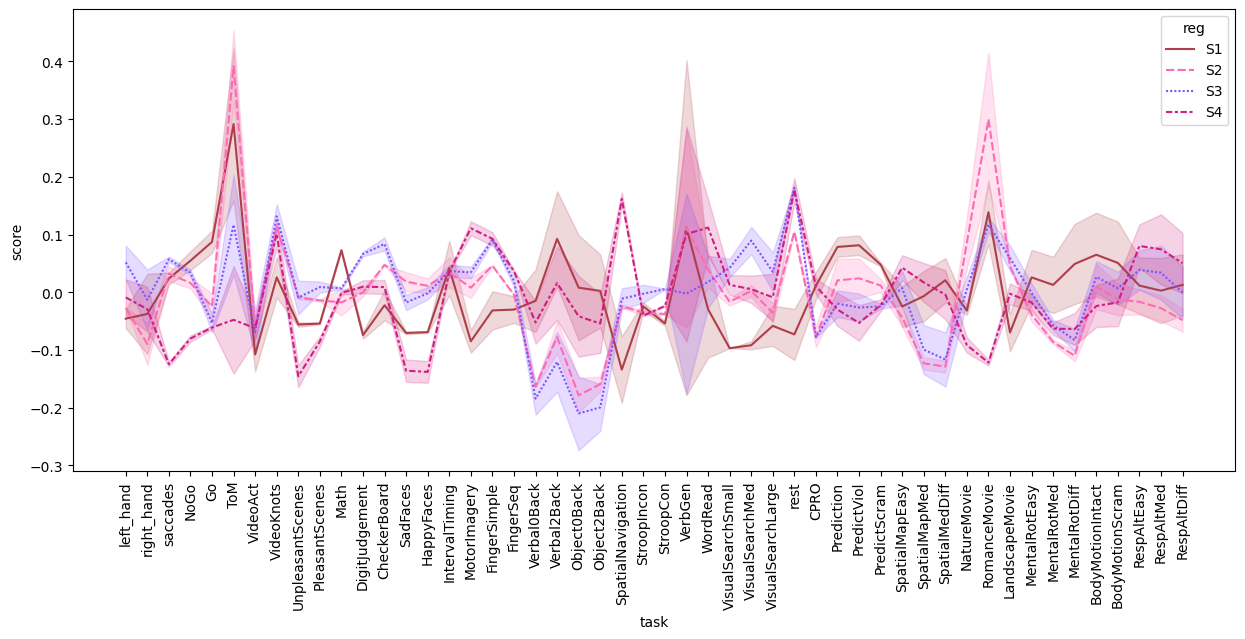

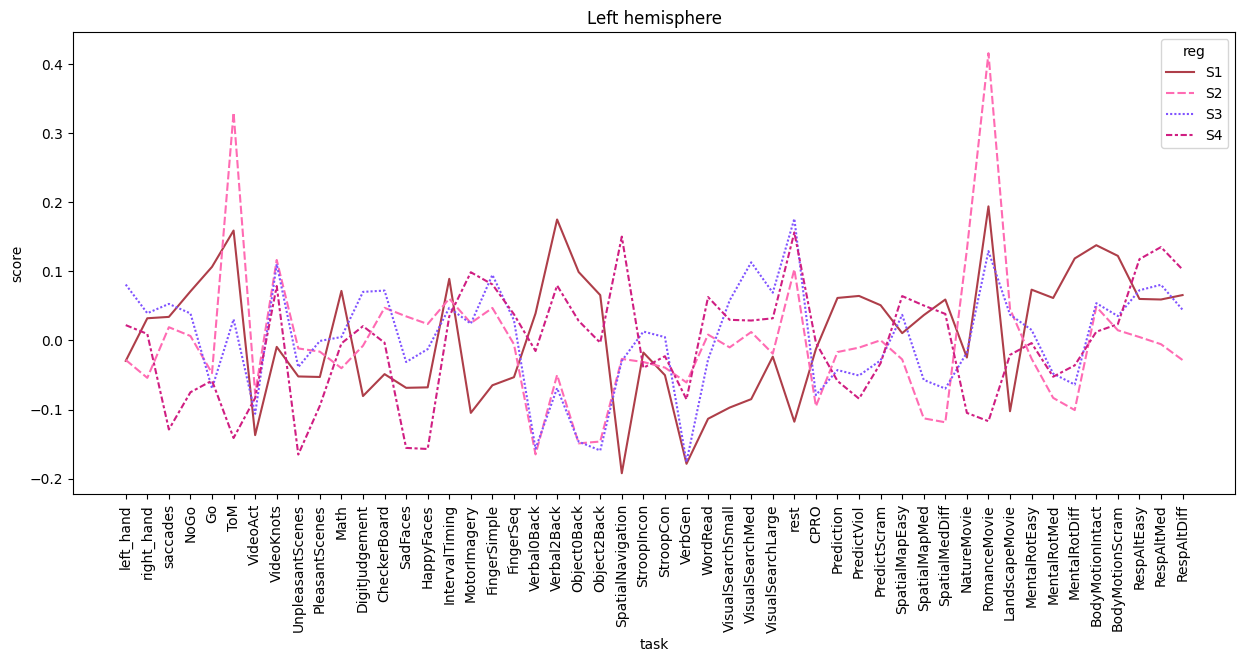

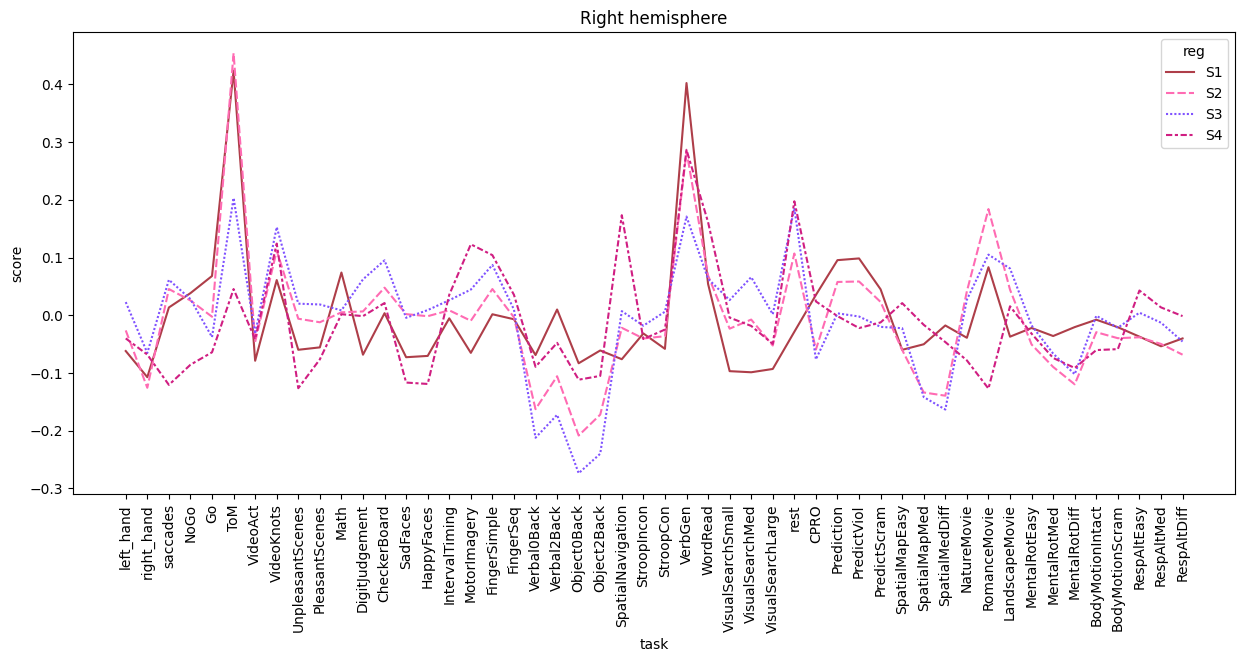

In [9]:
plt.figure(figsize=(15, 6))
sb.lineplot(data=T, x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['S1', 'S2', 'S3', 'S4'], style='reg')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side=='L'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['S1', 'S2', 'S3', 'S4'], style='reg')
plt.title('Left hemisphere')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side == 'R'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['S1', 'S2', 'S3', 'S4'], style='reg')
plt.title('Right hemisphere')
xt = plt.xticks(rotation=90)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

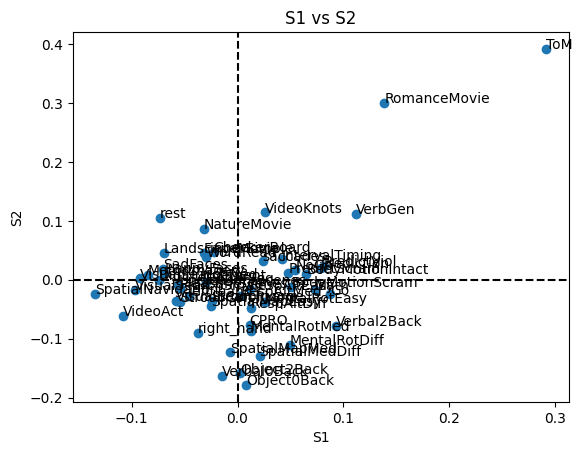

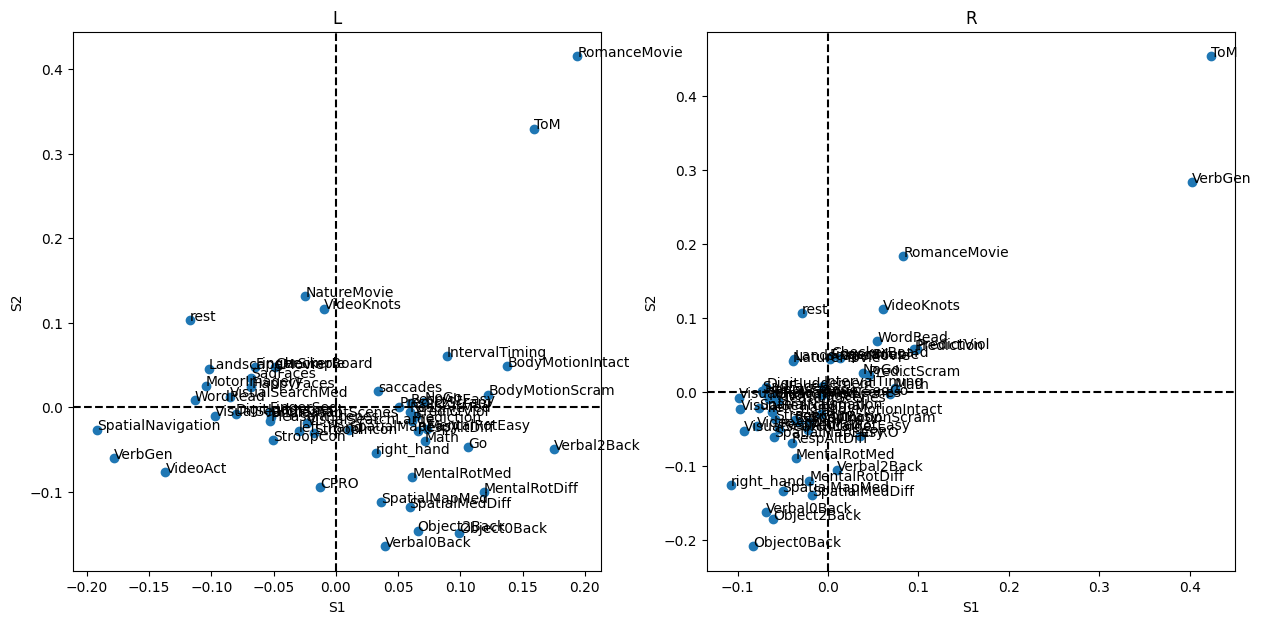

In [10]:
compare = ['S1', 'S2']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')
plt.savefig(f'{figure_path}/feature_scatter_social_{compare[0]}_vs_{compare[1]}.png', dpi=300)

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

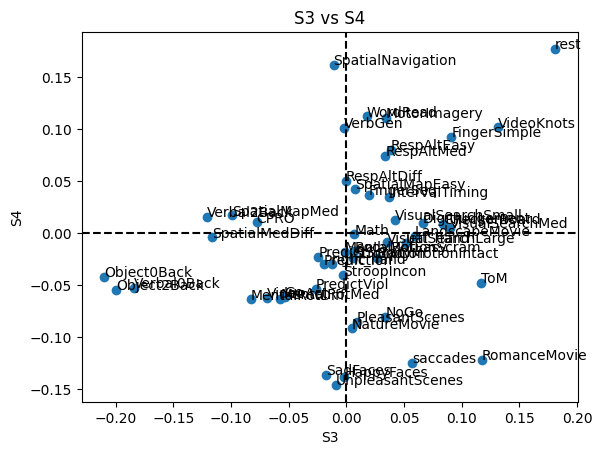

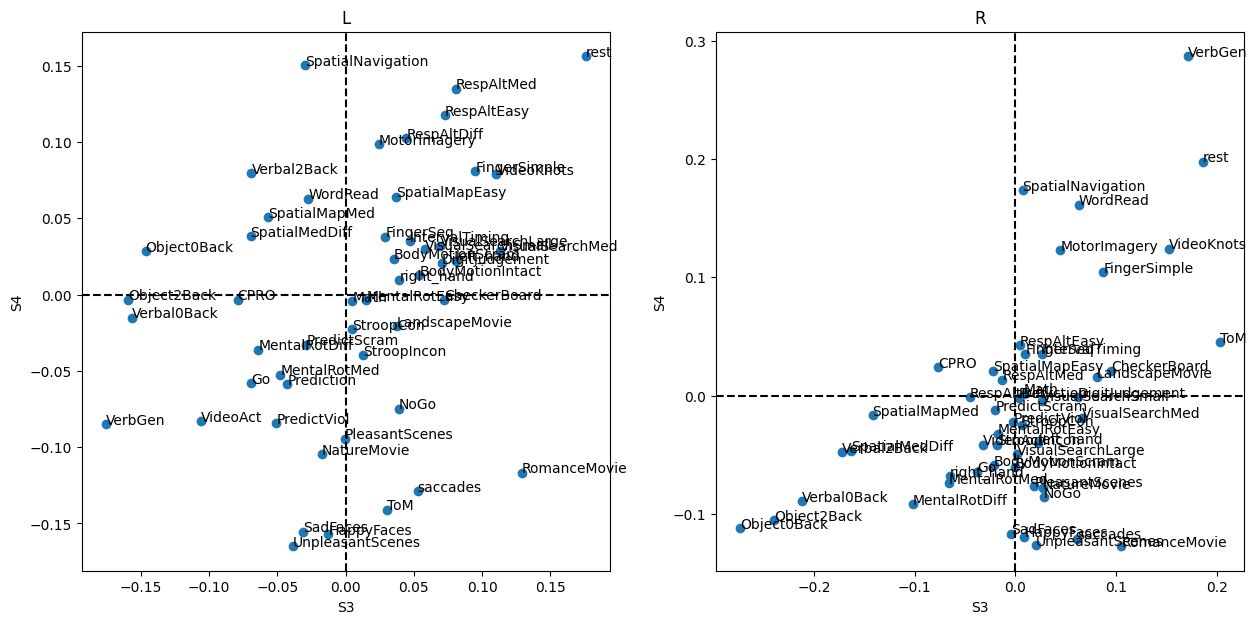

In [11]:
compare = ['S3', 'S4']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')
plt.savefig(
    f'{figure_path}/feature_scatter_social_{compare[0]}_vs_{compare[1]}.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

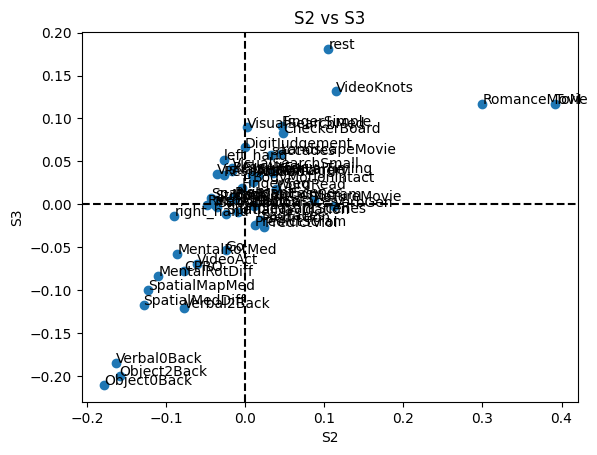

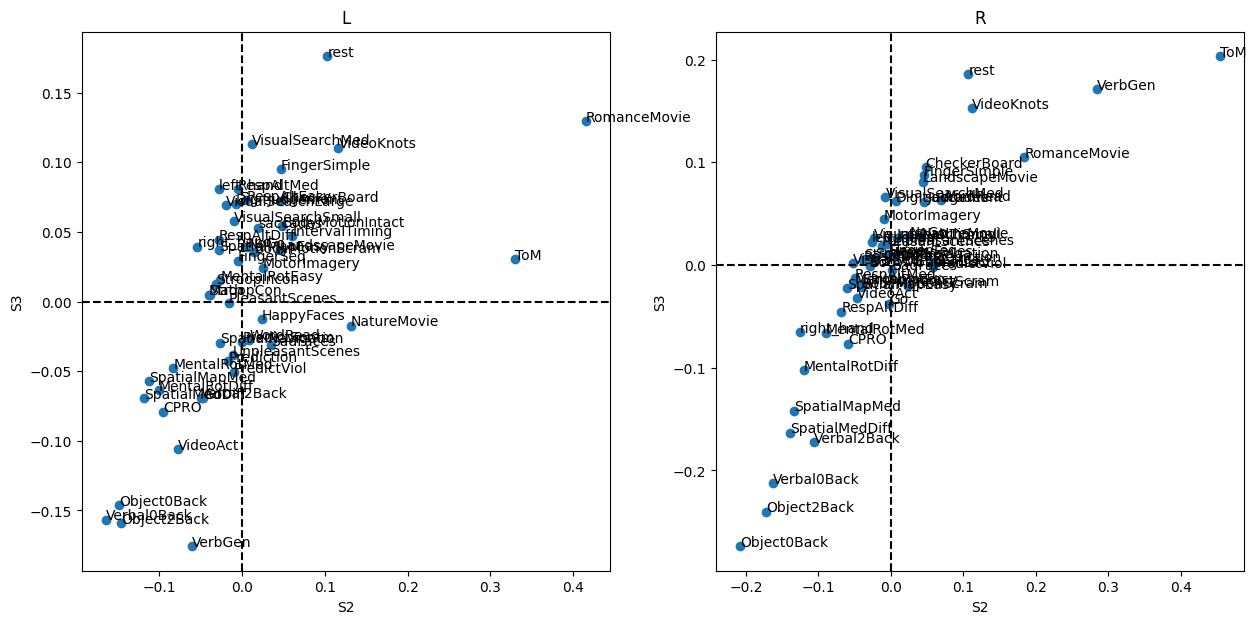

In [12]:
compare = ['S2', 'S3']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')
plt.savefig(
    f'{figure_path}/feature_scatter_social_{compare[0]}_vs_{compare[1]}.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

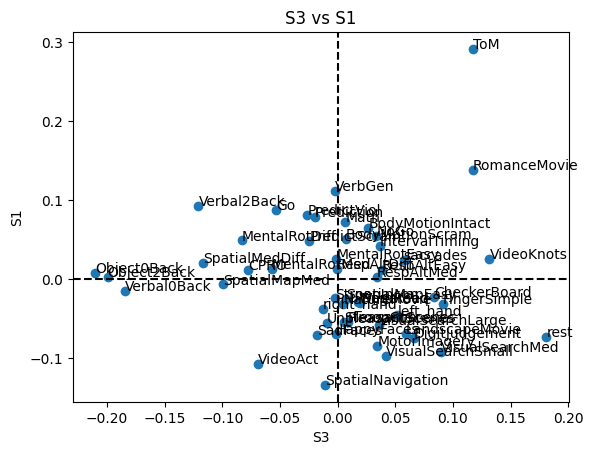

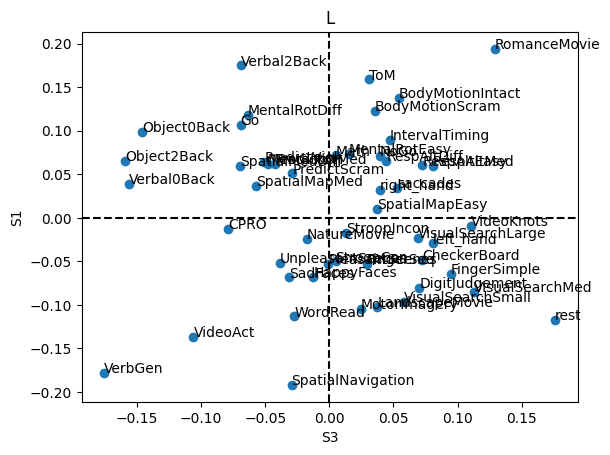

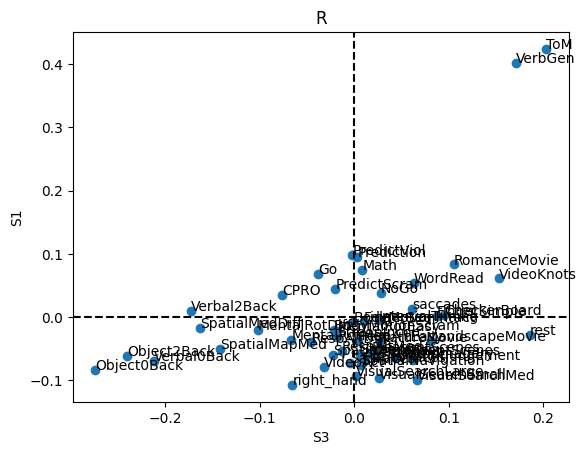

In [13]:
compare = ['S3', 'S1']
fm.scatter_plot(compare, T)
plt.figure()
fm.scatter_plot(compare, T, side='L')
plt.figure()
fm.scatter_plot(compare, T, side='R')


# Compare left and right hemisphere

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:151: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1 = data[data['reg'] == compare][data['side'] == 'L']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:152: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2 = data[data['reg'] == compare][data['side'] == 'R']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:154: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:155: FutureWarning: The default value of 

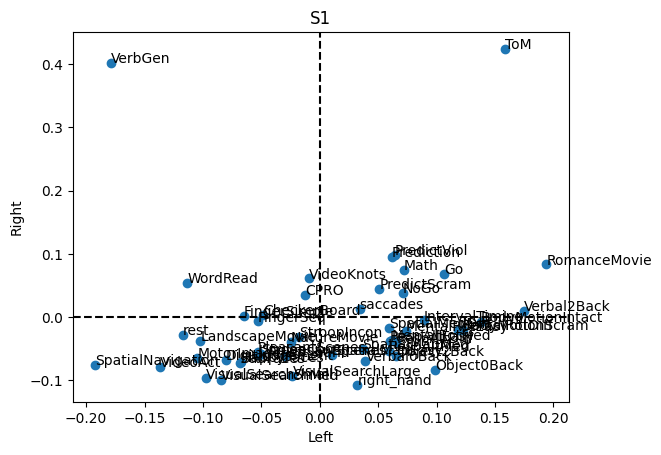

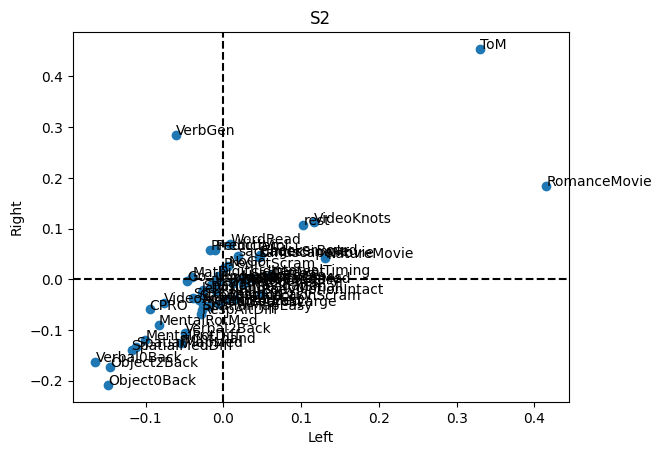

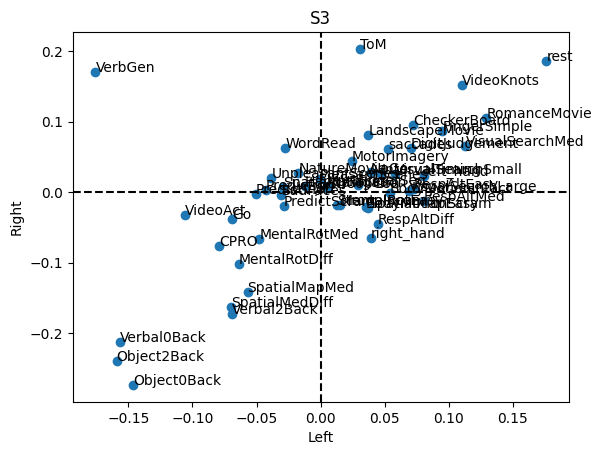

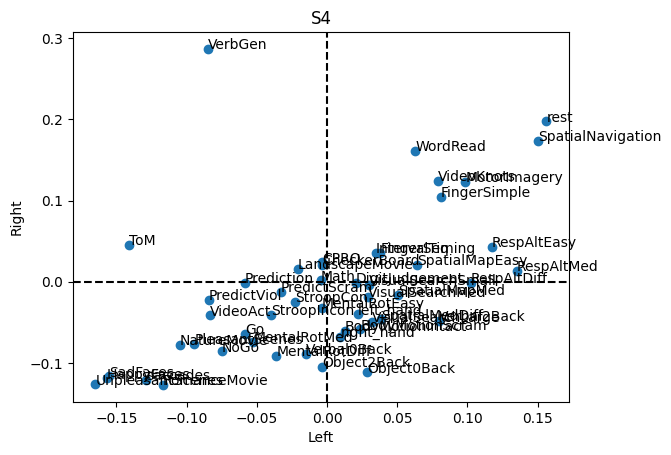

In [14]:
plt.figure()
fm.scatter_plot_hemispheres('S1', T)
plt.figure()
fm.scatter_plot_hemispheres('S2', T)
plt.figure()
fm.scatter_plot_hemispheres('S3', T)
plt.figure()
fm.scatter_plot_hemispheres('S4', T)


# Plot differentiating tasks

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

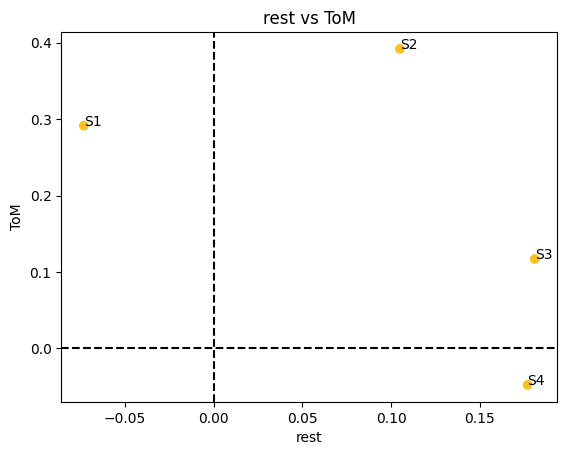

In [15]:
compare = ['rest', 'ToM']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

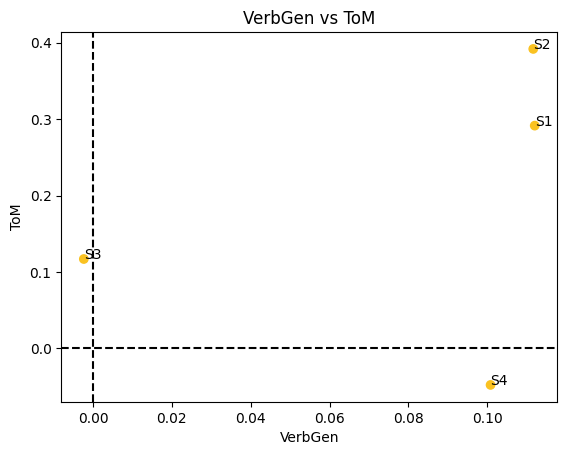

In [16]:
compare = ['VerbGen', 'ToM']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

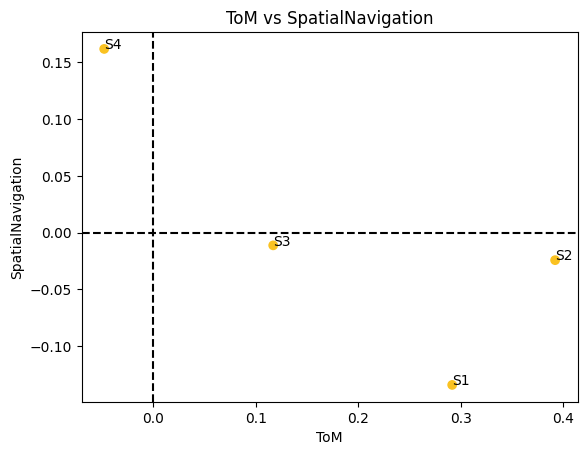

In [52]:
compare = ['ToM', 'SpatialNavigation']
fm.scatter_plot_tasks(compare, T, ignore_side=True)

plt.savefig(
    figure_path + f'localizers_social_{compare[0]}_{compare[1]}.png', dpi=300)


# Tasks that separate out left and right

([<matplotlib.axis.XTick at 0x7f9439337d00>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

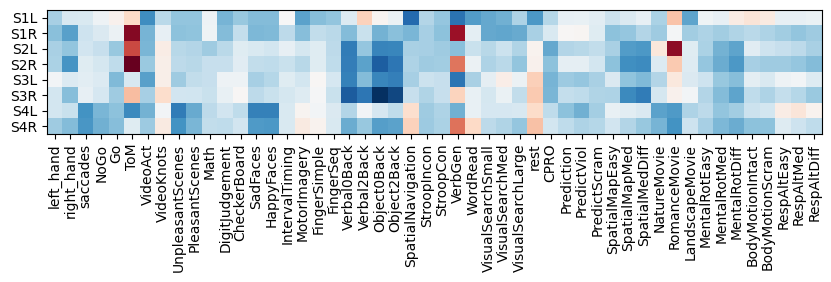

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(Features.loc[regions], cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


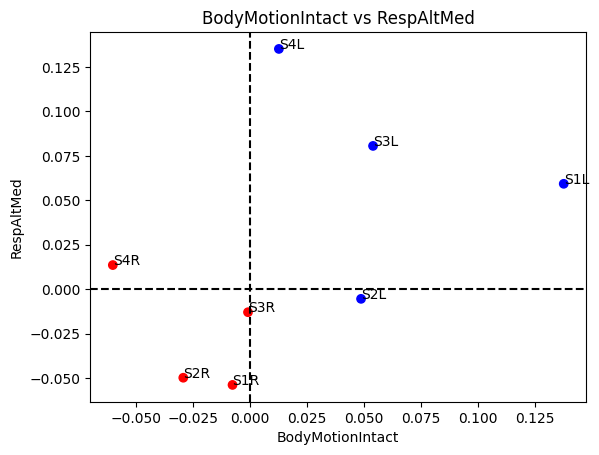

In [19]:
compare = ['BodyMotionIntact', 'RespAltMed']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


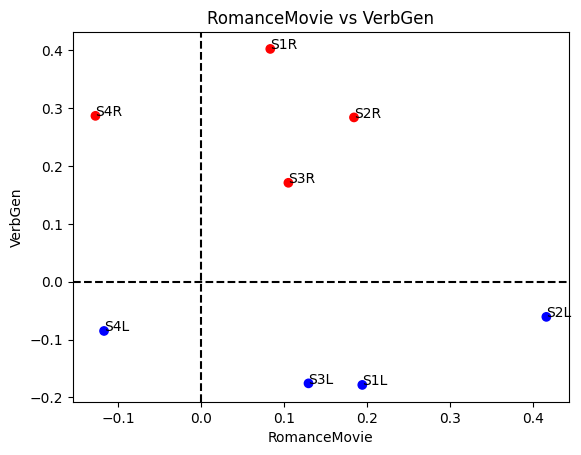

In [53]:
compare = ['RomanceMovie', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')
plt.savefig(figure_path + f'localizers_social_{compare[0]}_{compare[1]}_hemispheres.png', dpi=300)
